# Web Intelligence
## Cluster Analysis

#### Prof. Claudio Lucchese

## What is Cluster Analysis?!

- **Cluster**: A collection of data objects
  - **similar** (or related) to one another within the same group
  - **dissimilar** (or unrelated) to the objects in other groups
- **Cluster analysis** (or clustering, data segmentation, ...)
  - Finding similarities between data according to the characteristics found in the data and grouping similar data objects into clusters
- **Unsupervised learning**: no predefined classes (i.e., learning by observations vs. learning by examples: supervised)
- Typical applications:
  - As a **stand-alone tool** to get insight into data distribution 
  - As a **preprocessing step** for other algorithms

## Toy Example

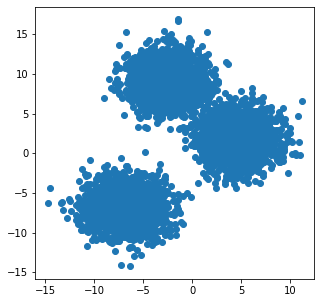

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
# use the following for more interactive plots
# %matplotlib inline 

import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

N_SAMPLES = 5000
N_CENTERS = 3
np.random.seed(42)

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, cluster_std=2.0)


# plot
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X[:,0], X[:,1])

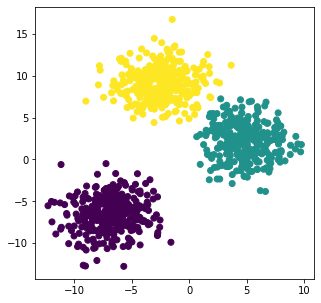

In [4]:
k_means = KMeans(n_clusters=N_CENTERS, n_init=1)
k_means.fit(X)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X[:,0], X[:,1], c=k_means.labels_)

In [5]:
X[:10,:]

array([[-6.31305145, -7.39791954],
       [-5.39543645, -6.28152443],
       [ 5.75653266,  2.12518047],
       [-3.42791942,  7.31459739],
       [-3.02838033,  6.00800022],
       [-6.76560094, -6.34292504],
       [ 5.40027454,  3.19434117],
       [ 6.47253419,  2.66614664],
       [ 5.0877071 ,  4.70145054],
       [ 7.05289677,  0.33929834]])

## Let's plot this !!


Python provides a package named **matplotlib** providing plotting functionalities.

Documentation is large (and complex), with plenty of examples:
 - https://matplotlib.org
 - https://matplotlib.org/api/pyplot_summary.html

Short tutorials are here:
 - https://matplotlib.org/users/pyplot_tutorial.html
 - https://www.labri.fr/perso/nrougier/teaching/matplotlib/
 
See also Seaborn:
 - https://seaborn.pydata.org/examples/index.html
 

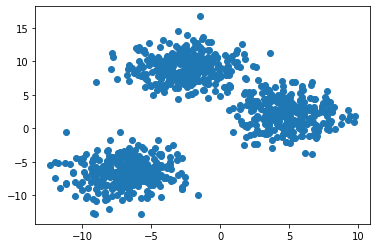

In [7]:
# nice rendering in the jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt # standard way to import

# create a figure, potentially a grid of plots
fig, ax = plt.subplots()

# fig is the "whole" figure object
# ax is the axis (the actual plot), could be a list of axis

# Uses as x coordinate the first column, 
# as y coordinate the second column
ax.plot( X[:,0], X[:,1], 'o' )

### Colors

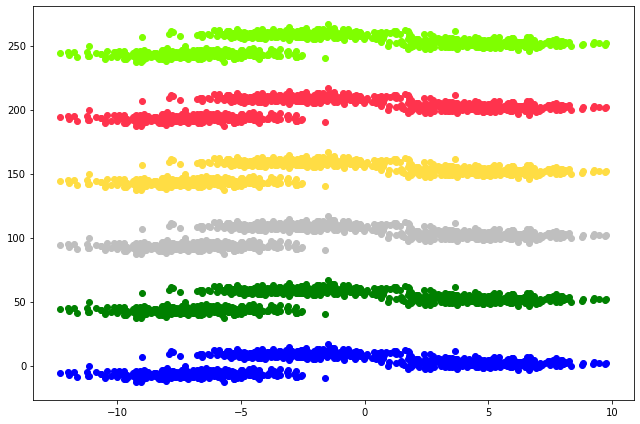

In [5]:
fig, ax = plt.subplots( figsize=(9,6), tight_layout=True) 

ax.plot( X[:,0], X[:,1],        'o', color='blue')        # specify color by name
ax.plot( X[:,0], X[:,1] +   50, 'o', color='g')           # short color code (rgbcmyk)
ax.plot( X[:,0], X[:,1] + 2*50, 'o', color='0.75')        # Grayscale between 0 and 1
ax.plot( X[:,0], X[:,1] + 3*50, 'o', color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
ax.plot( X[:,0], X[:,1] + 4*50, 'o', color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1 
ax.plot( X[:,0], X[:,1] + 5*50, 'o', color='chartreuse'); # all HTML color names supported

### Linestyles

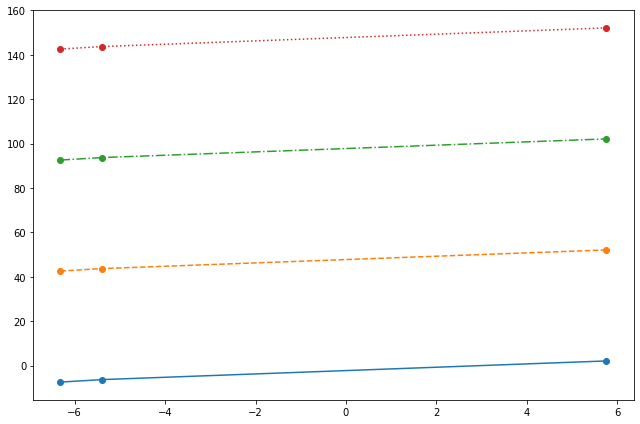

In [6]:
fig, ax = plt.subplots( figsize=(9,6), tight_layout=True) 

ax.plot( X[:3,0], X[:3,1],       'o', linestyle='-')  # solid 
ax.plot( X[:3,0], X[:3,1] +   50, 'o', linestyle='--') # dashed
ax.plot( X[:3,0], X[:3,1] + 2*50, 'o', linestyle='-.') # dashdot
ax.plot( X[:3,0], X[:3,1] + 3*50, 'o', linestyle=':'); # dotted

### Markers

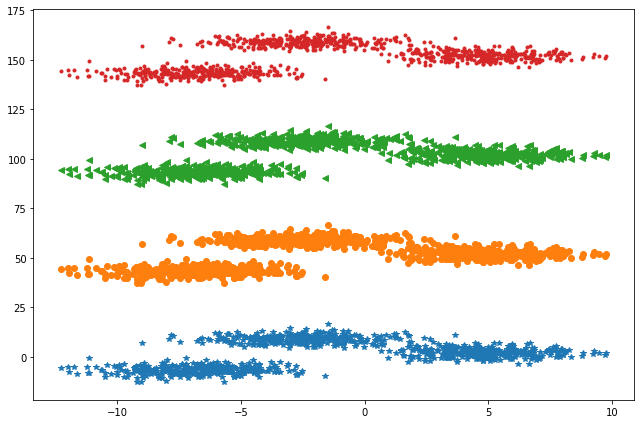

In [7]:
fig, ax = plt.subplots( figsize=(9,6), tight_layout=True) 

ax.plot( X[:,0], X[:,1],       linestyle='', marker='*') # star
ax.plot( X[:,0], X[:,1] +   50, linestyle='', marker='o') # circle
ax.plot( X[:,0], X[:,1] + 2*50, linestyle='', marker='<') # triangle_left
ax.plot( X[:,0], X[:,1] + 3*50, linestyle='', marker='.') # dot


### All of them

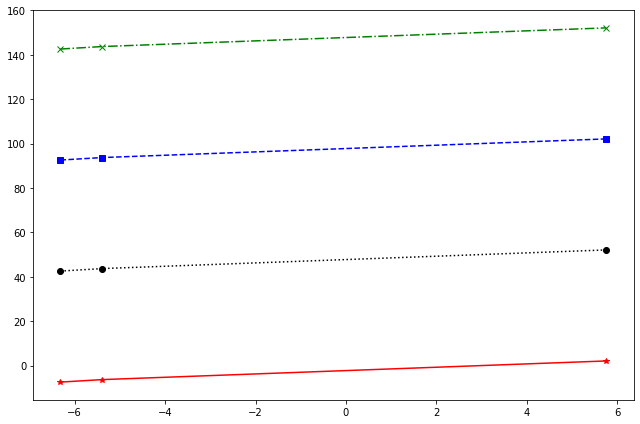

In [8]:
fig, ax = plt.subplots( figsize=(9,6), tight_layout=True) 

ax.plot( X[:3,0], X[:3,1],       'r-*') 
ax.plot( X[:3,0], X[:3,1] +   50, 'k:o') 
ax.plot( X[:3,0], X[:3,1] + 2*50, 'b--s')
ax.plot( X[:3,0], X[:3,1] + 3*50, 'g-.x')

### More customization

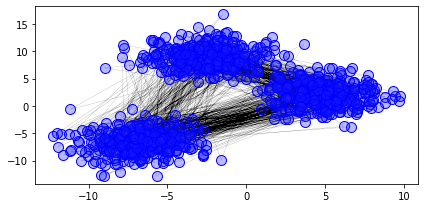

In [9]:
fig, ax = plt.subplots( figsize=(6,3), tight_layout=True) 

ax.plot( X[:,0], X[:,1], 'k-o',
             markersize=10,   # This is the size of the marker
             markerfacecolor=(0.1,0.1,1.0,0.3), # This is the color of the inner part
                                                # of the marker.
                                # Color is coded with 4 floats in [0,1]
                                # First 3 are RGB intensity
                                # Last is opacity (0 means transparent)
             markeredgecolor=(0,0,1,1),  # This is the color of the border of the marker
             linewidth= 0.1     # This is the line width
        )


### Labels

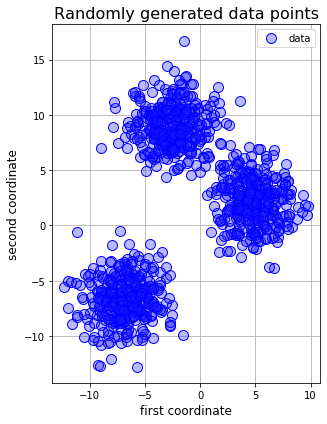

In [10]:
fig, ax = plt.subplots( figsize=(6,6), tight_layout=True) 

ax.plot(  X[:,0], X[:,1], 'o',
             ms=10,  mfc=(0.1,0.1,1.0,0.3), mec=(0,0,1,1), 
         label="data")

ax.set_title("Randomly generated data points", fontsize=16)
ax.set_xlabel("first coordinate", fontsize=12)
ax.set_ylabel("second coordinate", fontsize=12)

ax.legend()
ax.grid()
ax.set_aspect('equal')

## Clustering for Data Understanding and Applications!

- Biology: taxonomy of living things: kingdom, phylum, class, order, family, genus and species
- Information retrieval: document clustering
- Land use: Identification of areas of similar land use in an earth observation database
- Marketing: Help marketers discover distinct groups in their customer bases, and then use this knowledge to develop targeted marketing programs
- City-planning: Identifying groups of houses according to their house type, value, and geographical location
- Earth-quake studies: Observed earth quake epicenters should be clustered along continent faults
- Climate: understanding earth climate, find patterns of atmospheric and ocean
- Economic Science: market research

## Quality: What Is Good Clustering?!

- A good clustering method will produce high quality clusters
  - **high intra-class similarity**: cohesive within clusters
  - **low inter-class similarity**: distinctive between clusters
- The quality of a clustering method depends on
  - the **similarity measure** used by the method 
  - its implementation, and
  - Its ability to discover some or all of the hidden patterns
- Measuring clustering quality is difficult:
  - in general, the **true clustering is not know**
    - there is no objective benchmark of the clustering
  - **similarity-based measures** might not suffice (e.g., curse of dimensionality)
  - perceived quality by the analyst is **highly subjective**

## Considerations for Cluster Analysis!

- Partitioning criteria
  - **Single level vs. hierarchical** partitioning (often, multi-level hierarchical partitioning is desirable)
- Separation of clusters
  - **Exclusive** (e.g., one customer belongs to only one region) **vs. non-exclusive** (e.g., one document may belong to more than one class)
- Similarity measure
  - **Distance-based** (e.g., Euclidian, road network, vector)  vs. **connectivity-based** (e.g., density or contiguity)
- Clustering space
  - **Full space** (often when low dimensional) **vs. subspaces** (often in high-dimensional clustering)


## Requirements and Challenges

- Scalability
  - Clustering all the data instead of only on samples
- Ability to deal with different types of attributes
  - Numerical, binary, categorical, ordinal, linked, and mixture of these 
- Constraint-based clustering
  - User may give inputs on constraints
  - Use domain knowledge to determine input parameters
- Interpretability and usability
- Others 
  - Discovery of clusters with arbitrary shape
  - Ability to deal with noisy data
  - Incremental clustering and insensitivity to input order
  - High dimensionality


## Major Clustering Approaches

- **Partitioning** approach: 
  - Construct various partitions and then evaluate them by some criterion, e.g., minimizing the sum of square errors
  - Typical methods: **k-means**, **k-medoids**, CLARANS
- **Hierarchical** approach: 
  - Create a hierarchical decomposition of the set of data (or objects) using some criterion
  - Typical methods: Diana, Agnes, BIRCH, CAMELEON
- **Density-based** approach: 
  - Based on connectivity and density functions
  - Typical methods: **DBSCAN**, OPTICS, DenClue
- **Grid-based** approach: 
  - based on a multiple-level granularity structure
  - Typical methods: STING, WaveCluster, CLIQUE


## Major Clustering Approaches

- **Model-based**: 
  - A model is hypothesized for each of the clusters and tries to find the best fit of that model to each other
  - Typical methods: EM, SOM, COBWEB
- **Frequent pattern-based**:
  - Based on the analysis of frequent patterns
  - Typical methods: p-Cluster
- **User-guided or constraint-based**: 
  - Clustering by considering user-specified or application-specific constraints
  - Typical methods: COD (obstacles), constrained clustering
- **Link-based clustering**:
  - Objects are often linked together in various ways
  - Massive links can be used to cluster objects: SimRank, LinkClus


## How to design a clustering algorithm?

### Suggest your recipe!

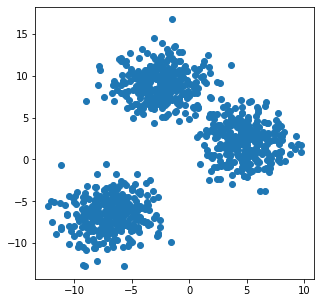

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X[:,0], X[:,1])

## Step 1: The Quality Measure

- Aiming at cohesive clusters, we can minimize the error $E$ as *the distance among points in the same cluster*.

- Aiming at speed, we can define the *center* of a cluster, and measure the distances between each  point and the corresponding cluster center

$$
E = \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} \textsf{dist}(p,c_i)^2
$$

If we use Euclidean distance:
$$
E = \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} \|p-c_i\|^2
$$

$E$ is known as Sum of Squared Errors (SSE).

## Step 2: Simplifying assumption

1. Assume we know the correct number of clusters is $k$


## Step 3: Define an algorithm

- Pretend that a random assignment to the $k$ clusters is a reasonable solution

- How to improve it ?

- **We want to minimize our cost function!**


1. Given the clusters $C_1, \ldots, C_k$, **what is the set of centers that minimizes the error $E$**?
  - We simplify the following assuming points are 1D.

$$
\textrm{minimize}\quad E = \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} \|p-c_i\|^2
$$
$$
\begin{array}{rcl}
\displaystyle\frac{\partial E}{\partial c_i} & = &  \displaystyle\frac{\partial}{\partial c_i} \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} (p-c_i)^2 = 0 \\
&  & \sum\limits_{p\in C_i} 2 (p-c_i) (-1) = 0 \\ 
&  & \sum\limits_{p\in C_i} p - \sum\limits_{p\in C_i} c_i = 0 \\ 
&  & \sum\limits_{p\in C_i} p - |C_i|\cdot c_i = 0 \\ 
&  & c_i = \displaystyle\frac{\sum\limits_{p\in C_i} p}{|C_i|} \\ 
\end{array}
$$

  
   - The new center $c_i$ of $C_i$ is the mean of the points $p\in C_i$.

2. Given the new centers $c_1, \ldots, c_k$, **what is the set of clusters that minimizes the error $E$**?
  - We minimize $\|p-c_i\|^2$ by putting $p$ in the cluster $C_i$ of the closest center $c_i$.
3. Repeat until convergence.

This algorithm is named **k-means**.

## Step-by-Step k-means scikit-learn

"Scikit-learn is a simple and efficient tools for data mining and data analysis"

http://scikit-learn.org/stable/

Iter: 1  | E = 27546.625659396304
Iter: 2  | E = 10418.581961608763
Iter: 3  | E = 7598.869956751257
Iter: 4  | E = 7556.713834598948
Iter: 5  | E = 7543.7746713448705
Iter: 6  | E = 7542.814257357565


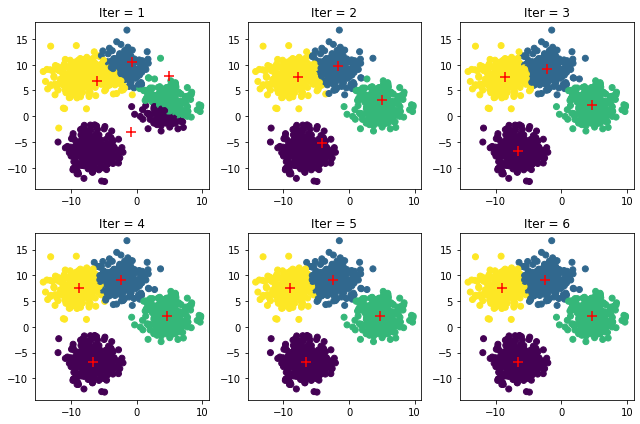

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

N_SAMPLES = 1000
N_CENTERS = 4
np.random.seed(42)

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, cluster_std=2.0)



fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9,6), tight_layout=True)

for i, ax in enumerate(axs.flatten()):
    max_iter = i+1
    
    # run k-means with k=(i+1)
    k_means = KMeans(n_clusters=N_CENTERS, max_iter=max_iter, n_init=1,  init='random', 
                     random_state=11)
    k_means.fit(X)
    
    # plot output of k-means
    ax.scatter(X[:,0], X[:,1], c=k_means.labels_)
    # plot cluster centers
    c = k_means.cluster_centers_
    ax.scatter(c[:,0], c[:,1], c='red', marker='+', s=100)
    # put a title
    ax.set_title("Iter = "+str(max_iter))
    
    # print SSE (named intertial_ by scikit)
    print ("Iter:", max_iter, " | E =", k_means.inertia_)

## Partitioning Algorithms: Basic Concepts

- **Partitioning method**: Partitioning a database $D$ of $n$ objects into a set of $k$ clusters, such that the *sum of squared distances* is minimized (where $c_i$ is the centroid or medoid of cluster $C_i$):
$$
E = \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} \|p-c_i\|^2
$$


- Given $k$, find a partition of $k$ clusters that optimizes the chosen partitioning criterion
  - The problem is **NP-hard** for a general number of clusters $k$ even in the 2-D Euclidean space.
  - Global optimal: exhaustively enumerate all partitions
  - Heuristic methods: k-means and k-medoids algorithms
  - **k-means** (MacQueen’67, Lloyd’57/’82): Each cluster is represented by the center of the cluster
  - **k-medoids or PAM (Partition around medoids)** (Kaufman & Rousseeuw’87): Each cluster is represented by one of the objects in the cluster  


## The K-Means Clustering Method

- Given $k$, the k-means algorithm is implemented in four steps:
  1. Partition objects into $k$ nonempty subsets
  2. Compute seed points as the centroids of the clusters of the current partitioning (the centroid is the center, i.e., mean point, of the cluster)
  3. Assign each object to the cluster with the nearest seed point  
  4. Go back to Step 2, stop when the assignment does not change


## Comments on the K-Means Method

- **Strength**: 
  - **Efficient**: $O(tkn)$, where $n$ is # objects, $k$ is # clusters, and $t$  is # iterations. Normally, $k,t << n$.
  - Good for spherical, equi-sized, similarly distributed clusters
  - Comment: Often terminates at a **local optimal**. 
- **Weakness**
  - Need to specify the number of clusters $k$
  - Not suitable to discover clusters with non-spherical shapes
  - Sensitive to noisy data and outliers
    - a far-away point may push the centroid
  - Applicable only to objects in a continuous n-dimensional space 
    - how to compute mean with categorical data?
  - Small clusters might be absorbed by larger ones

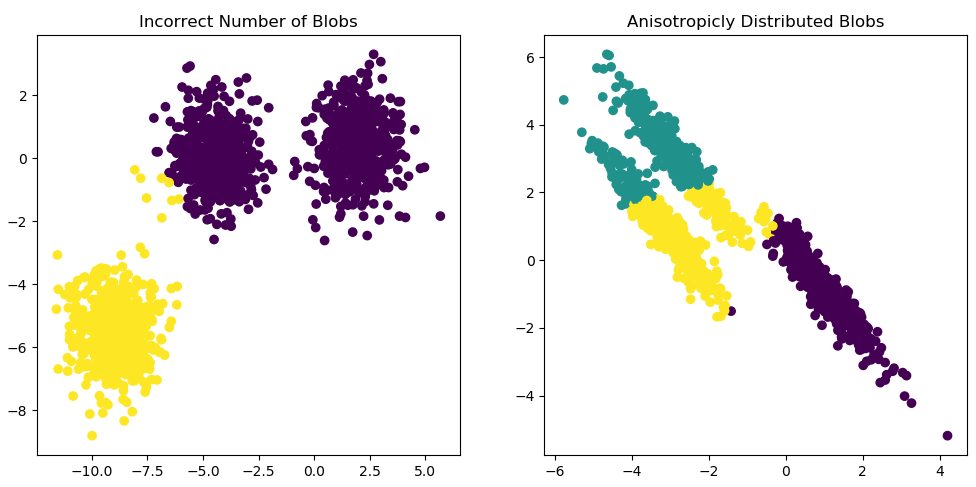

See: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

#### Exercise: Inject outliers and run k-means

#### Exercise: Compare k-means on different synthetic datasets provided by scikit

#### Exercise: Run k-means on songs or movies dataset

## How to decrease sensitivity to outliers?
## k-medoids methods
## Partitioning Around Medoids algorithm

- **Idea**: do not compute centers, but rather take a point from the cluster as the new center
  - note: mean is not a point of the dataset
  
  
- Given $k$, select $k$ objects $o_1,\ldots,o_k$ (the medoids) from the dataset at random:
  1. Assign each object to the cluster $C_i$ corresponding to the closest medoid $o_i$
  2. For every medoid $o_j$ and for every other point  $o_{other}$ in the dataset
  3. If replacing $o_j$ with $o_{other}$ reduces $E$ then:
     - update centroids
  4. If centroids changed then repeat from step 1


#### Exercise: Implement k-medoid and compare it with k-means in presence of outliers

## Hierarchical Clustering

- Use **distance/similarity matrix** as clustering criteria.  
  - The distance matrix $D$ has $D[i,j]$ being the distance between objects $i$ and $j$
  - The similarity matrix $S$ has $S[i,j]$ being the similarity between objects $i$ and $j$
- This method does not require the number of clusters $k$ as an input
- **Agglomerative** hierarchical clustering method uses a bottom-up strategy. 
  - Initially each object form its own cluster, which are iteratively merged until a single cluster becomes the hierarchy’s root.
- **Divisive** hierarchical clustering method employs a top-down strategy.
  - Initially all objects form a single cluster, which is recursively split into smaller clusters.


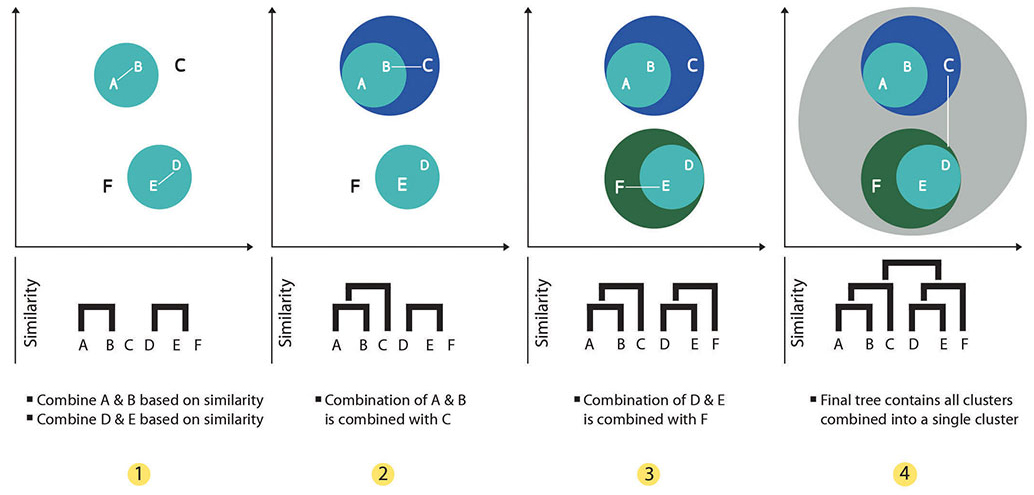

## Hierarchical Clustering Algorithm

1. Compute similarity matrix
2. Every point is a cluster
3. Repeat:
  - Join the two closest clusters $C_i,C_j$
  - Update the similarity matrix, i.e., similarity of $C_i\cup C_j$ with any other $C_k$
  - Until one cluster is left
 
- The key operation is how to compute similarity between clusters
- Algorithms differ on the similarity function they use

Clusters are determined:
 - by early stopping the merge when $k$ clusters are created
 - by quitting the algorithm when all clusters are less similar than a user given threshold 
 
 
Complexity is $O(n^3)$, for the naive implementation, $O(n^2\log n)$ if a heaps are used, and $O(n^2)$ for the single linkage case.

In the general case $O(n^3)$:
 - there are $n$ steps
 - each step requires:
    - finding the minimum in $n^2$ elements
    - computing distance between the new cluster and $n$ points
    - updating $n$ entries of the similarity matrix
    

A better implementation has a heap for each row of the matrix and it costs $O(n^2\log n)$:
 - there are $n$ steps
 - each step requires:
    - finding the minimum in $n$ heaps with cost $O(n\log n)$
    - computing distance between the new cluster and $n$ points
    - updating $n$ entries of the similarity matrix

Single linkage can be implemented efficiently in $O(n^2)$:
 - For each point we store the closest other point and its distance in a vector $V$ of pairs of size $n$
 - there are $n$ steps
 - each step requires:
    - finding the smallest distance in $V$
    - computing distance between the new cluster and $n$ points
    - updating $V$ entries of the similarity vector


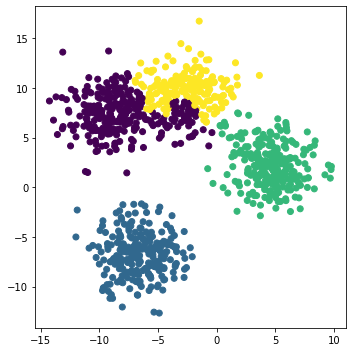

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AgglomerativeClustering

N_SAMPLES = 1000
N_CENTERS = 4
np.random.seed(42)

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, cluster_std=2.0)

# run hierarchical clustering
h_clust = AgglomerativeClustering(n_clusters=N_CENTERS, linkage="complete")
clusters = h_clust.fit_predict(X)

# plot clusterd points
fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
ax.scatter(X[:,0], X[:,1], c=clusters)


## Dendrogram with SciPy

"SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python."

https://www.scipy.org/

Text(0.5, 1.0, 'Dendrogram')

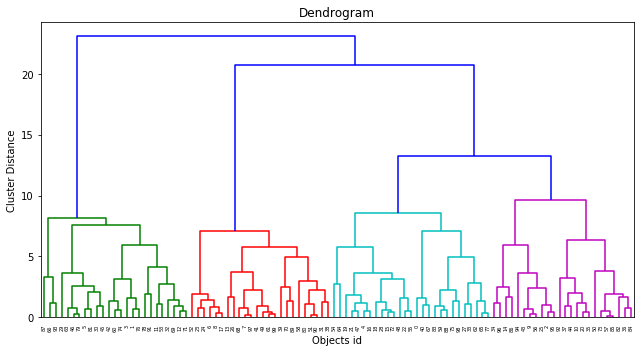

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram

N_SAMPLES = 100
N_CENTERS = 4
np.random.seed(42)

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, cluster_std=2.0)

# run the clustering
Z = linkage(X, method="complete")

# plot the dendrogram
fig, ax = plt.subplots(figsize=(9,5), tight_layout=True)
dendrogram(Z, color_threshold=10)
ax.set_ylabel("Cluster Distance")
ax.set_xlabel("Objects id")
ax.set_title("Dendrogram")

## How would you estimate clusters similarity?

## Definition of Linkage Measures

- Typical cluster similarity measures are the following:
  
  
  - **Single**: minimum distance $\textsf{dist}(C_i, C_j) = \min\limits_{x\in C_i, y\in C_j} \textsf{dist}(x,y)$
    - Cons:  it overestimates similarity, and it may produce chaining
  
  
  - **Complete**: maximum distance $\textsf{dist}(C_i, C_j) = \max\limits_{x\in C_i, y\in C_j} \textsf{dist}(x,y)$
    - Cons: It underestimates similarity, favors globular clusters


  - **Average**: average distance $\textsf{dist}(C_i, C_j) = \frac{1}{|C_i||C_j|}\sum\limits_{x\in C_i, y\in C_j} \textsf{dist}(x,y)$
    - Pros: In the middle of the other above two  


  - **Centroid/Medoid**: distance between centroids/medoids $\textsf{dist}(C_i, C_j) = \textsf{dist}(o_i, o_j)$ 
    - Pros: Fast!


  - **Ward**: variance minimization
    - Pros: similar objective of k-means

## Comparison of Linkage Measures

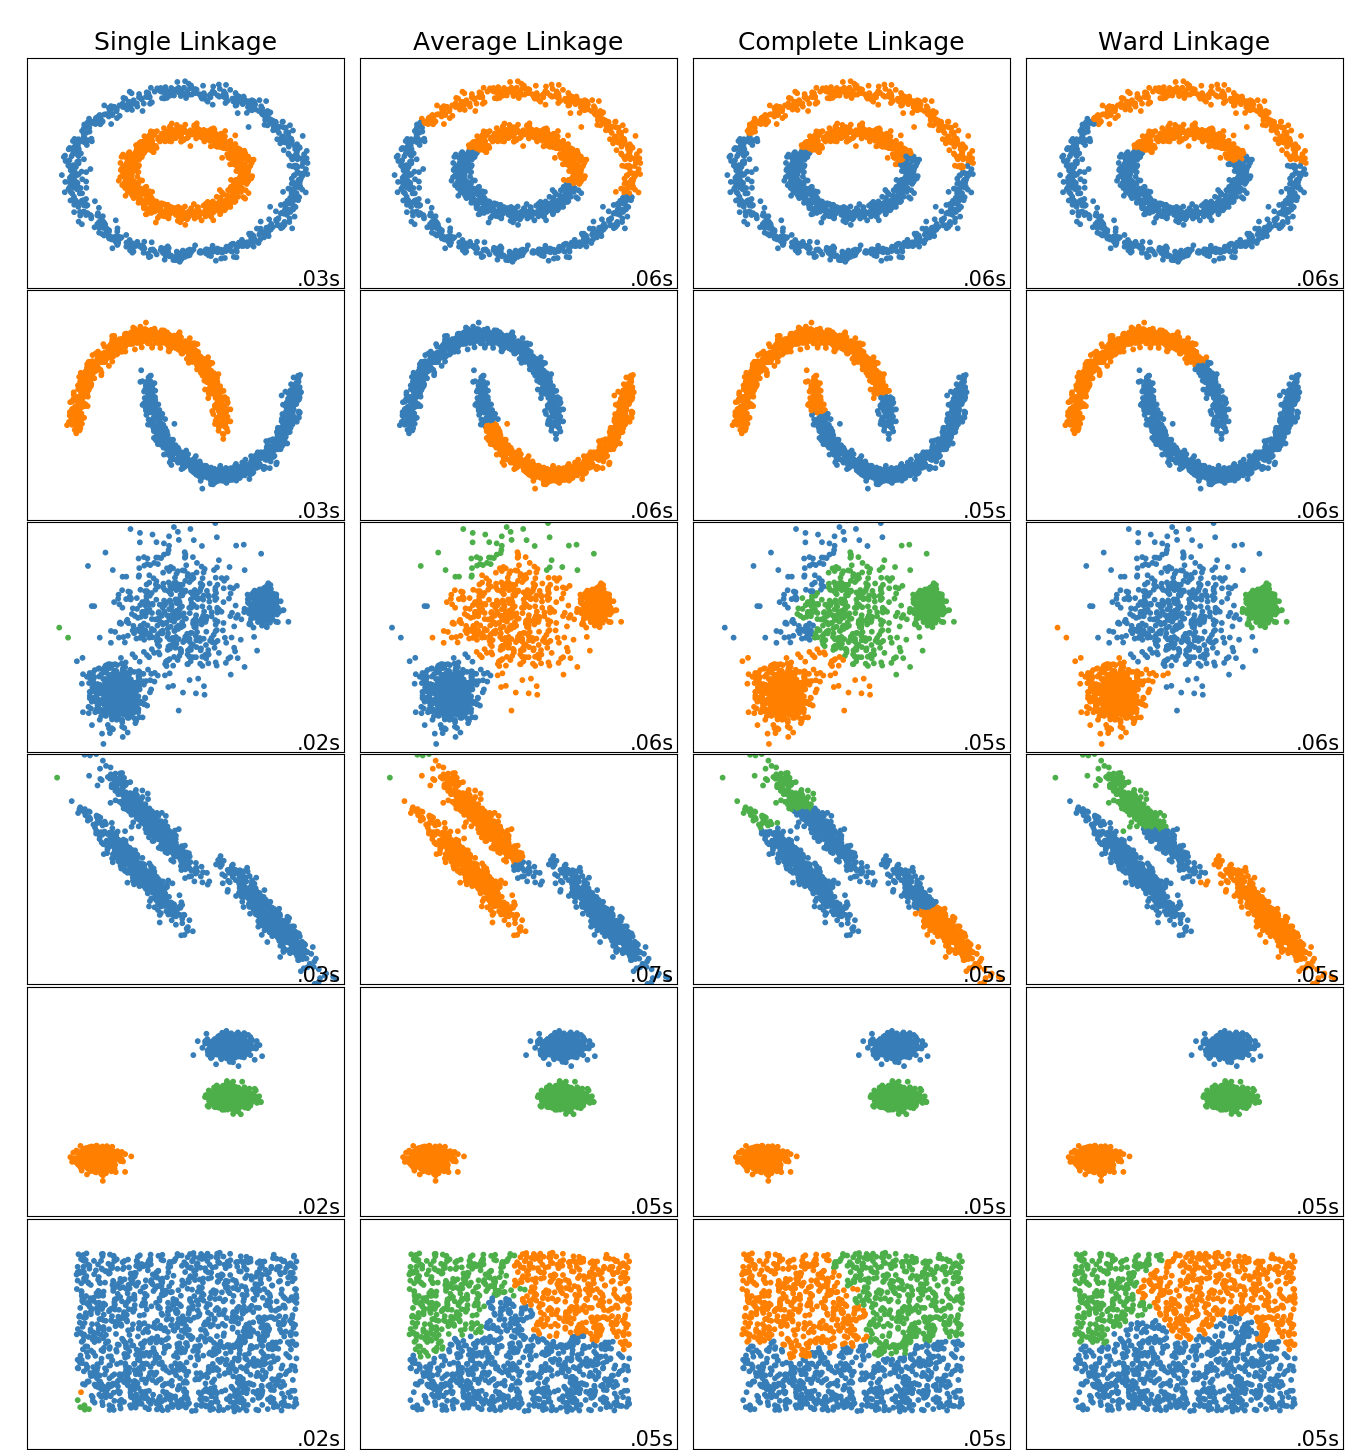

#### Exercise: compare k-means and hierarchical on the digits dataset

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
images = digits.images

fig, axs = plt.subplots(ncols=3, figsize=(9,3))
axs[0].imshow(images[0], cmap='gray_r')
axs[1].imshow(images[1], cmap='gray_r')
axs[2].imshow(images[2], cmap='gray_r')

## Slides Credits

- **Data Mining Concepts and Techniques Third Edition**. Jiawei Han, Micheline Kamber Jian Pei.  Morgan Kaufmann/Elsevier. Third Edition. 2012.

## References

- **Data Mining Concepts and Techniques Third Edition**. Jiawei Han, Micheline Kamber Jian Pei.  Morgan Kaufmann/Elsevier. Third Edition. 2012.
  - Chapter 10: from 10.1 to 10.3.2